# Análisis Exhaustivo y Limpieza de Datos para Predicción de Churn
Este notebook realiza un análisis exploratorio, limpieza y preprocesamiento de datos utilizando el dataset de predicción de churn de clientes de Telco. El análisis abarca desde estadísticas descriptivas hasta la detección y manejo de datos inconsistentes, duplicados, nulos y valores atípicos. Finalmente, se prepara un dataset limpio para el modelado predictivo.

## Carga y Exploración Inicial
En esta sección se realiza la carga del dataset, inspección de sus primeras filas, y se obtienen estadísticas iniciales de las columnas numéricas y categóricas para entender la estructura de los datos.

In [63]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Ruta del archivo CSV
df = pd.read_csv(file_path)

# Inspeccionar las primeras filas
print("## Primeras filas del dataset:")
display(df.head())

# Información general del dataset
print("\n## Información general del dataset:")
df.info()

# Estadísticas descriptivas de las columnas numéricas
print("\n## Estadísticas descriptivas de las columnas numéricas:")
display(df.describe())

# Estadísticas descriptivas de las columnas categóricas
print("\n## Estadísticas descriptivas de las columnas categóricas:")
display(df.describe(include=['O']))

## Primeras filas del dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



## Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



## Estadísticas descriptivas de las columnas categóricas:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Verificación de Valores Faltantes y Duplicados
Se identifican columnas con valores nulos, filas duplicadas, y se evalúan las posibles acciones para tratar estos problemas.

In [64]:
# Identificar valores nulos
print("\n## Valores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print("\n## Número de filas duplicadas en el dataset:")
print(df.duplicated().sum())


## Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Número de filas duplicadas en el dataset:
0


## Exploración de Valores Únicos y Categóricos
Aquí se realiza un análisis detallado de la cantidad de valores únicos en cada columna y las categorías presentes en columnas categóricas.

In [65]:
# Resumen de valores únicos por columna
print("\n## Valores únicos por columna:")
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} valores únicos")

# Listar las categorías únicas para columnas categóricas
print("\n## Categorías únicas en columnas categóricas:")
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


## Valores únicos por columna:
customerID: 7043 valores únicos
gender: 2 valores únicos
SeniorCitizen: 2 valores únicos
Partner: 2 valores únicos
Dependents: 2 valores únicos
tenure: 73 valores únicos
PhoneService: 2 valores únicos
MultipleLines: 3 valores únicos
InternetService: 3 valores únicos
OnlineSecurity: 3 valores únicos
OnlineBackup: 3 valores únicos
DeviceProtection: 3 valores únicos
TechSupport: 3 valores únicos
StreamingTV: 3 valores únicos
StreamingMovies: 3 valores únicos
Contract: 3 valores únicos
PaperlessBilling: 2 valores únicos
PaymentMethod: 4 valores únicos
MonthlyCharges: 1585 valores únicos
TotalCharges: 6531 valores únicos
Churn: 2 valores únicos

## Categorías únicas en columnas categóricas:
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fibe

## Identificación y Manejo de Valores No Estándar
Se revisan las columnas categóricas para identificar valores no esperados, inconsistentes o con problemas (como espacios en blanco, caracteres especiales, etc.).

In [66]:
# Detectar valores no estándar en columnas categóricas
print("\n## Verificación de valores no estándar en columnas categóricas:")
for column in categorical_columns:
    non_standard_values = df[column].value_counts().index[
        df[column].value_counts().index.str.contains(r'^\s*$|[^a-zA-Z0-9\s]', regex=True)
    ]
    if len(non_standard_values) > 0:
        print(f"{column}: Valores no estándar -> {non_standard_values.tolist()}")


## Verificación de valores no estándar en columnas categóricas:
customerID: Valores no estándar -> ['7590-VHVEG', '3791-LGQCY', '6008-NAIXK', '5956-YHHRX', '5365-LLFYV', '5855-EIBDE', '8166-ZZTFS', '0129-KPTWJ', '9128-CPXKI', '9509-MPYOD', '0594-UFTUL', '0463-TXOAK', '0265-PSUAE', '7036-ZZKBD', '1928-BXYIV', '2832-SCUCO', '2988-GBIVW', '3647-GMGDH', '8024-XNAFQ', '0345-XMMUG', '6305-YLBMM', '9360-OMDZZ', '0504-HHAPI', '9965-YOKZB', '1986-PHGZF', '8218-FFJDS', '2956-GGUCQ', '5760-FXFVO', '3049-SOLAY', '0362-ZBZWJ', '7813-ZGGAW', '6522-OIQSX', '6119-SPUDB', '3154-HMWUU', '2192-CKRLV', '1541-ETJZO', '5073-RZGBK', '4274-OWWYO', '7581-EBBOU', '4211-MMAZN', '8979-CAMGB', '3556-BVQGL', '6595-COKXZ', '9356-AXGMP', '5176-OLSKT', '7508-DQAKK', '0016-QLJIS', '7544-ZVIKX', '7550-WIQVA', '5871-DGTXZ', '7816-VGHTO', '4007-NHVHI', '5181-OABFK', '0961-ZWLVI', '3006-XIMLN', '8443-WVPSS', '3011-WQKSZ', '1269-FOYWN', '7396-VJUZB', '5032-MIYKT', '5219-YIPTK', '5701-ZIKJE', '1230-QAJDW', '5458-CQJTA', '98

## Limpieza y Conversión de Columnas Problemáticas
Se realizan ajustes en las columnas con valores problemáticos o inconsistentes. Por ejemplo, la columna `TotalCharges` contiene valores que deben ser convertidos a numéricos.

In [67]:
# Limpieza de la columna 'TotalCharges'
if 'TotalCharges' in df.columns:
    print("\n## Limpieza de la columna 'TotalCharges'")
    
    # Convertir temporalmente a string para realizar operaciones con .str
    df["TotalCharges"] = df["TotalCharges"].astype(str)
    
    print("Valores no estándar antes de la conversión:")
    print(df["TotalCharges"][~df["TotalCharges"].str.replace('.', '', 1, regex=False).str.isdigit()])
    
    # Convertir 'TotalCharges' a numérica
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    
    print("\n## Valores nulos en 'TotalCharges' después de la conversión:")
    print(df["TotalCharges"].isnull().sum())
    
    # Eliminar filas con valores nulos en 'TotalCharges'
    df = df.dropna(subset=["TotalCharges"])
    print("Filas con valores nulos eliminadas.")


## Limpieza de la columna 'TotalCharges'
Valores no estándar antes de la conversión:
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

## Valores nulos en 'TotalCharges' después de la conversión:
11
Filas con valores nulos eliminadas.


## Verificación Final del Dataset Limpio
Se revisa nuevamente la estructura del dataset tras las limpiezas realizadas, confirmando que los datos están preparados para análisis posteriores.

In [68]:
# Confirmar estructura tras la limpieza
print("\n## Información general después de la limpieza:")
df.info()

# Guardar dataset limpio
output_path = "dataset_limpio.csv"
df.to_csv(output_path, index=False)
print(f"\nDataset limpio guardado en: {output_path}")


## Información general después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16 

## Análisis Exploratorio de Datos (EDA)
Se realizan visualizaciones y análisis estadísticos avanzados para explorar patrones y relaciones entre las variables.

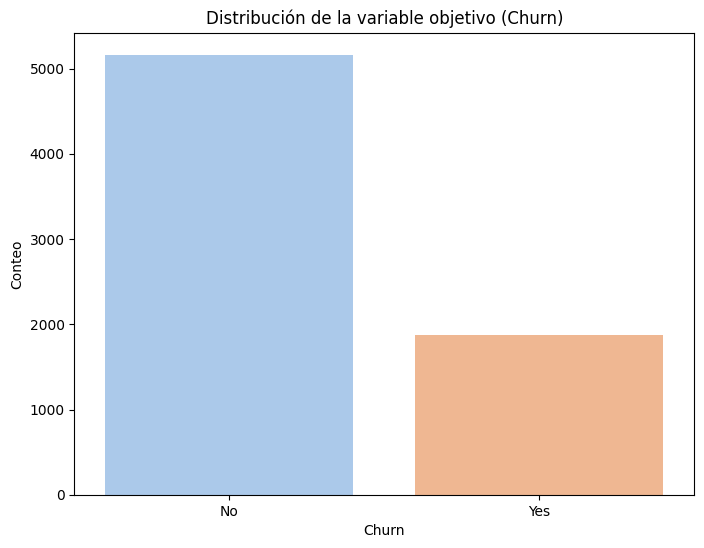

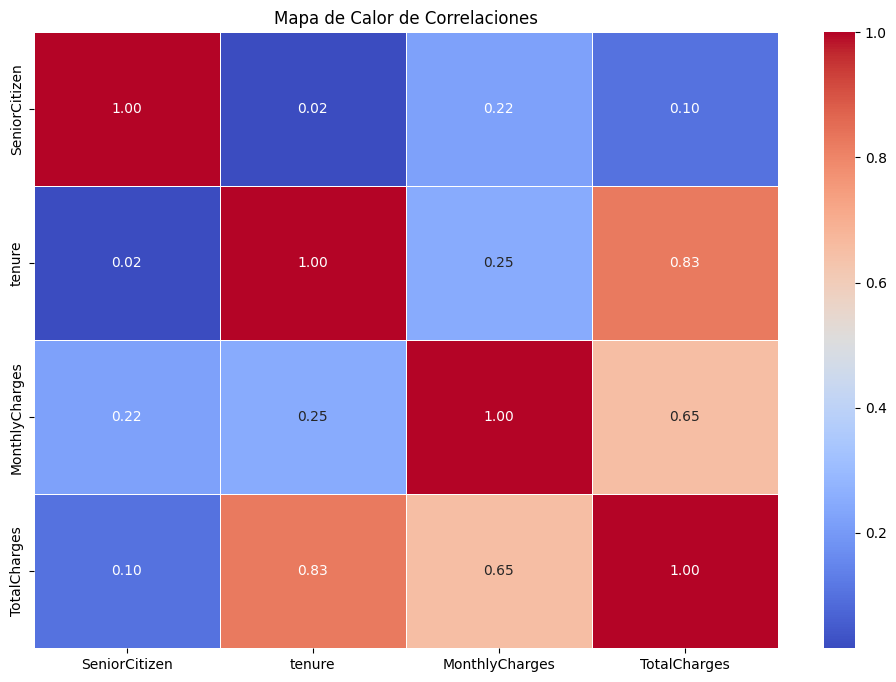

In [69]:
# Visualizar distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Churn", palette="pastel", hue="Churn", dodge=False, legend=False)
plt.title("Distribución de la variable objetivo (Churn)")
plt.xlabel("Churn")
plt.ylabel("Conteo")
plt.show()

# Análisis de correlaciones
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)  # Aseguramos que solo use variables numéricas
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

## Conclusión
El dataset ha sido limpiado y analizado. Está listo para proceder con las etapas de modelado y predicción. Se han eliminado inconsistencias, se manejaron valores nulos y no estándar, y se realizó un análisis exploratorio exhaustivo.

## Codificación de Variables Categóricas

En esta sección, se transforman las variables categóricas en valores numéricos utilizando técnicas de **One-Hot Encoding** y **Label Encoding**.  
Esto es necesario porque los algoritmos de Machine Learning requieren entradas numéricas para realizar cálculos.

### Pasos Realizados:
1. Identificar las variables categóricas.
2. Aplicar One-Hot Encoding a variables con múltiples categorías.
3. Aplicar Label Encoding a variables binarias (como 'Yes'/'No').

El resultado será un dataset listo para su uso en la fase de modelado.

In [70]:
# Identificar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Variables categóricas identificadas:", categorical_columns)

# Copia del DataFrame para no alterar el original
df_encoded = df.copy()

# Aplicar Label Encoding a variables binarias
label_encoder = LabelEncoder()
binary_columns = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for column in binary_columns:
    if column in df_encoded.columns:
        print(f"Aplicando Label Encoding a la columna: {column}")
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Aplicar One-Hot Encoding a variables con múltiples categorías
multi_category_columns = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines']

print("\nAplicando One-Hot Encoding a las columnas con múltiples categorías...")
df_encoded = pd.get_dummies(df_encoded, columns=multi_category_columns, drop_first=True)

# Confirmar los cambios en el DataFrame
print("\nResumen del DataFrame después de la codificación:")
print(df_encoded.info())

# Mostrar las primeras filas del dataset codificado
print("\nPrimeras filas del dataset codificado:")
display(df_encoded.head())

Variables categóricas identificadas: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Aplicando Label Encoding a la columna: Churn
Aplicando Label Encoding a la columna: Partner
Aplicando Label Encoding a la columna: Dependents
Aplicando Label Encoding a la columna: PhoneService
Aplicando Label Encoding a la columna: PaperlessBilling

Aplicando One-Hot Encoding a las columnas con múltiples categorías...

Resumen del DataFrame después de la codificación:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                         

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No,Yes,No,...,0,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,Male,0,0,0,34,1,Yes,No,Yes,...,0,False,False,True,False,False,False,True,False,False
2,3668-QPYBK,Male,0,0,0,2,1,Yes,Yes,No,...,1,False,False,False,False,False,False,True,False,False
3,7795-CFOCW,Male,0,0,0,45,0,Yes,No,Yes,...,0,False,False,True,False,False,False,False,True,False
4,9237-HQITU,Female,0,0,0,2,1,No,No,No,...,1,True,False,False,False,False,True,False,False,False


## Normalización/Estandarización de Variables Numéricas

En esta sección, las variables numéricas se escalan para que tengan una distribución con media 0 y desviación estándar 1 (Estandarización) o se normalizan en un rango específico.  
Esto asegura que todas las variables numéricas contribuyan de manera equitativa al modelo, evitando que aquellas con mayores valores numéricos dominen el proceso de entrenamiento.

### Pasos Realizados:
1. Identificar las variables numéricas.
2. Aplicar **StandardScaler** de `sklearn` para estandarizar las variables numéricas.

In [71]:
# Identificar las variables numéricas
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(f"Variables numéricas a estandarizar: {numerical_columns}")

# Convertir TotalCharges a float (si aún está en formato object)
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')

# Aplicar StandardScaler
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Confirmar la transformación
print("\nResumen de las variables numéricas después de la estandarización:")
display(df_encoded[numerical_columns].describe())

# Mostrar las primeras filas del dataset estandarizado
print("\nPrimeras filas del dataset después de la estandarización:")
display(df_encoded.head())

Variables numéricas a estandarizar: ['tenure', 'MonthlyCharges', 'TotalCharges']

Resumen de las variables numéricas después de la estandarización:


,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,6.062651e-17,-1.119064e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01
max,1.612573e+00,1.793381e+00,2.824261e+00



Primeras filas del dataset después de la estandarización:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,Female,0,1,0,-1.280248,0,No,Yes,No,...,0,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,Male,0,0,0,0.064303,1,Yes,No,Yes,...,0,False,False,True,False,False,False,True,False,False
2,3668-QPYBK,Male,0,0,0,-1.239504,1,Yes,Yes,No,...,1,False,False,False,False,False,False,True,False,False
3,7795-CFOCW,Male,0,0,0,0.512486,0,Yes,No,Yes,...,0,False,False,True,False,False,False,False,True,False
4,9237-HQITU,Female,0,0,0,-1.239504,1,No,No,No,...,1,True,False,False,False,False,True,False,False,False


## División del Dataset en Conjuntos de Entrenamiento y Prueba

En esta sección, dividimos el dataset en dos partes:
- **Entrenamiento (80%)**: Se utiliza para ajustar el modelo.
- **Prueba (20%)**: Se utiliza para evaluar el desempeño del modelo.

La variable objetivo es `Churn`, y el resto de las columnas actuarán como características (`X`). El método `train_test_split` de `sklearn` se utiliza para realizar esta división de forma aleatoria y reproducible.

In [72]:
# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['Churn', 'customerID'], errors='ignore')  # Excluimos 'Churn' y 'customerID' si existen
y = df_encoded['Churn']  # Variable objetivo

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar resultados de la división
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

# Verificar las distribuciones en y_train y y_test
print("\nDistribución de la variable objetivo en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de la variable objetivo en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: 5625 filas
Tamaño del conjunto de prueba: 1407 filas

Distribución de la variable objetivo en el conjunto de entrenamiento:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de prueba:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


## Codificación Adicional de Variables Categóricas

Hemos detectado que algunas columnas aún contienen valores categóricos como `'Yes'` y `'No'`. Para resolver esto, aplicaremos **Label Encoding** a las columnas restantes. 

Esto asegurará que todas las características sean numéricas y el modelo pueda entrenarse sin errores.

## Construcción del Modelo Predictivo: Regresión Logística

En esta sección, implementaremos un modelo de **Regresión Logística** para predecir la variable objetivo `Churn`.  
La Regresión Logística es un algoritmo clásico y eficiente para problemas de clasificación binaria, que servirá como nuestro modelo base.  

### Pasos:
1. Entrenamiento del modelo en el conjunto de entrenamiento.
2. Evaluación del modelo en el conjunto de prueba utilizando métricas clave:
   - **Precisión** (Accuracy).
   - **Matriz de confusión**.
   - **Recall** (Tasa de verdaderos positivos).
   - **F1-Score**.
3. Visualización de los resultados.

In [73]:
# Verificar columnas actuales del DataFrame
print("Columnas actuales en el DataFrame codificado:")
print(df_encoded.columns)

# Lista de columnas que queremos eliminar
columns_to_drop = ['customerID', 'Churn']

# Filtrar solo las columnas que realmente existen
columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(columns=columns_to_drop, errors='ignore')  # Excluir columnas si existen
y = df_encoded['Churn'] if 'Churn' in df_encoded.columns else None

# Verificar si la variable objetivo 'Churn' existe
if y is None:
    raise ValueError("La columna 'Churn' no está presente en el DataFrame.")

# División del dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Mostrar resultados de la división
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

# Verificar las distribuciones en y_train y y_test
print("\nDistribución de la variable objetivo en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de la variable objetivo en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

# Entrenar el modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Crear y entrenar el modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar resultados
print("\n### Evaluación del Modelo: Regresión Logística ###\n")
print(f"Precisión del modelo: {accuracy:.4f}\n")
print("Matriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(class_report)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusión: Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Columnas actuales en el DataFrame codificado:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes'],
      dtype='object')

Tamaño del conjunto de entrenamiento: 5625 filas
Tamaño del conjunto de prueba: 1407 filas

Distribución de la variable objetivo en el conjunto de entrenamiento:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de prueba:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: fl

ValueError: could not convert string to float: 'Male'

### 🌳 Construcción y Evaluación del Modelo: Árbol de Decisión

En esta sección, entrenamos un modelo de **Árbol de Decisión** para predecir la variable objetivo **Churn**. Este modelo es útil porque permite interpretar visualmente las reglas de decisión que usa para clasificar los datos.

- **Precisión del Modelo**: Se calcula utilizando `accuracy_score`.
- **Matriz de Confusión**: Representa las predicciones correctas e incorrectas.
- **Reporte de Clasificación**:
   - Precisión, Recall y F1-Score para cada clase (0: No Churn, 1: Churn).

---

**Parámetros del Modelo**:
- `max_depth=5`: Limita la profundidad del árbol para evitar el sobreajuste.
- `random_state=42`: Garantiza reproducibilidad de los resultados.

---

**Resultados**:
- La **precisión**, matriz de confusión y reporte de clasificación se mostrarán como salida.
- La matriz de confusión se visualizará gráficamente para una mejor interpretación.

### Evaluación del Modelo: Árbol de Decisión ###

Precisión del modelo: 0.7867803837953091

Matriz de Confusión:
[[952  81]
 [219 155]]


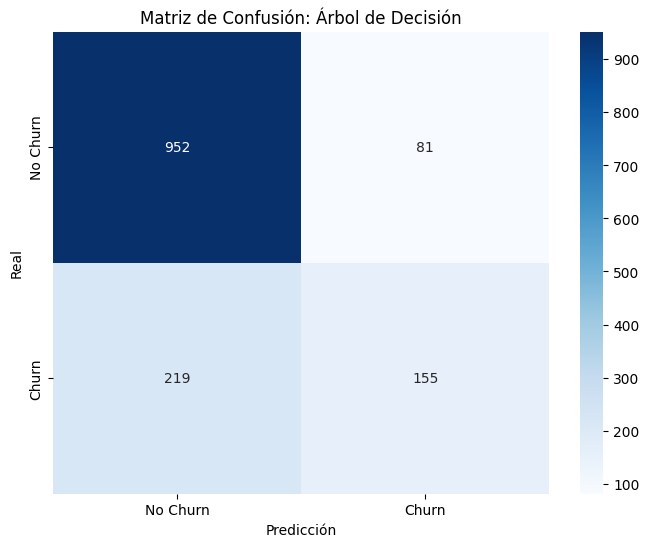


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.66      0.41      0.51       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



In [39]:
# Inicializar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth limita la profundidad del árbol

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_dt = dt_model.predict(X_test)

# Evaluar el modelo
print("### Evaluación del Modelo: Árbol de Decisión ###\n")
print("Precisión del modelo:", accuracy_score(y_test, y_pred_dt))

# Matriz de Confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nMatriz de Confusión:")
print(conf_matrix_dt)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: Árbol de Decisión")
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))

## Construcción del Modelo Predictivo: Random Forest

En esta sección implementaremos el modelo **Random Forest**, una técnica de ensamblado que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Este modelo es especialmente útil en datasets desequilibrados como el nuestro.

### Objetivos
1. Entrenar un modelo **Random Forest**.
2. Evaluar su desempeño mediante:
   - **Precisión**.
   - **Matriz de Confusión**.
   - **Reporte de Clasificación** (`precision`, `recall`, `f1-score`).

### Hiperparámetros del Modelo
- **`n_estimators=100`**: Número de árboles en el bosque.
- **`max_depth=10`**: Profundidad máxima de cada árbol para evitar el sobreajuste.
- **`random_state=42`**: Garantiza reproducibilidad de resultados.

### Evaluación
El modelo se evaluará comparando sus predicciones con los valores reales del conjunto de prueba:
1. **Precisión Global** del modelo.
2. **Matriz de Confusión** para visualizar los aciertos y errores.
3. **Reporte de Clasificación** para obtener métricas detalladas por clase.

### Evaluación del Modelo Optimizado: Random Forest ###

Precisión del modelo: 0.7193

Matriz de Confusión:
[[717 316]
 [ 79 295]]


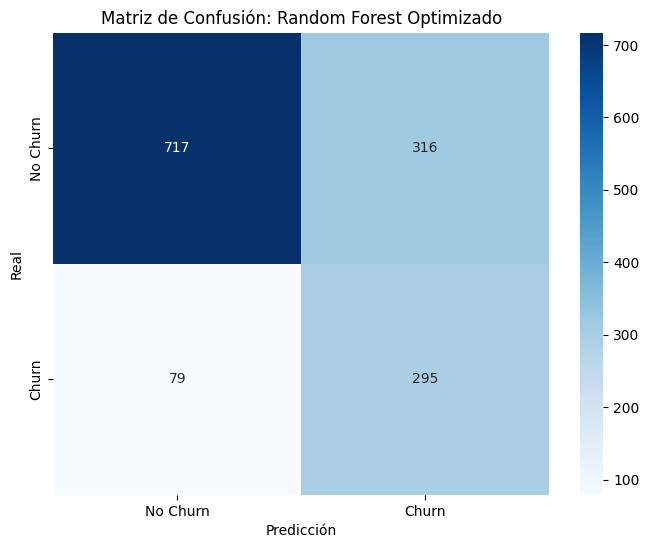


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



In [ ]:
# Inicializar el modelo con ajuste de pesos y nuevos hiperparámetros
rf_model_balanced = RandomForestClassifier(
    n_estimators=200,           # Número de árboles
    max_depth=10,               # Profundidad máxima del árbol
    min_samples_split=10,       # Mínimo de muestras para dividir un nodo
    class_weight='balanced',    # Ajustar pesos para manejar el desbalance
    random_state=42
)

# Entrenar el modelo
rf_model_balanced.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf_balanced = rf_model_balanced.predict(X_test)

# Evaluar el modelo
print("### Evaluación del Modelo Optimizado: Random Forest ###\n")
accuracy_rf_balanced = accuracy_score(y_test, y_pred_rf_balanced)
print(f"Precisión del modelo: {accuracy_rf_balanced:.4f}")

# Matriz de Confusión
conf_matrix_rf_balanced = confusion_matrix(y_test, y_pred_rf_balanced)
print("\nMatriz de Confusión:")
print(conf_matrix_rf_balanced)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: Random Forest Optimizado")
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_balanced))

## Mejorando el Modelo con SMOTE: Balanceo de Clases

### Objetivo:  
Mejorar el desempeño del modelo al predecir la clase "Churn" (1) utilizando **SMOTE** para balancear las clases.

### Estrategia:
1. Aplicar **SMOTE** al conjunto de entrenamiento para generar datos sintéticos en la clase minoritaria.  
2. Entrenar nuevamente el modelo Random Forest en el dataset balanceado.  
3. Evaluar el desempeño del modelo ajustado y comparar los resultados con el modelo original.

---

/Users/josephcode/Programacion/Prediccion_de_clientes/entorno_prediccion_clientes/lib/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/josephcode/Programacion/Prediccion_de_clientes/entorno_prediccion_clientes/lib/python3.13/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribución de clases después de aplicar SMOTE:
Churn
0    4130
1    4130
Name: count, dtype: int64

### Evaluación del Modelo con SMOTE: Random Forest ###

Precisión del modelo: 0.7356

Matriz de Confusión:
[[748 285]
 [ 87 287]]


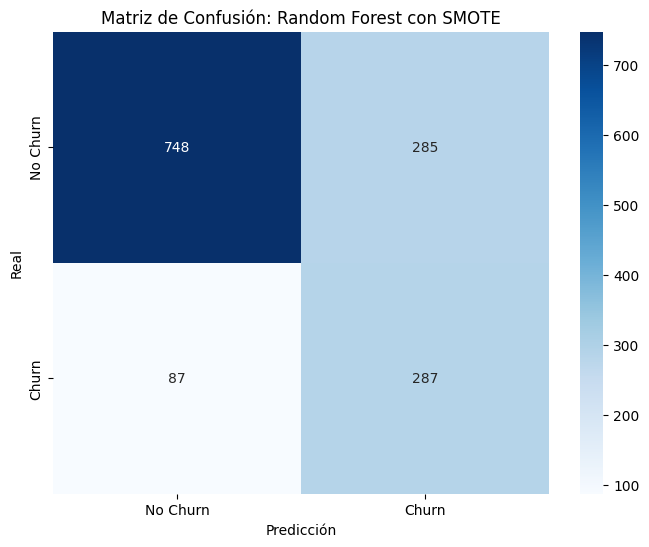


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.74      0.75      1407



In [ ]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
print("Distribución de clases después de aplicar SMOTE:")
print(y_train_smote.value_counts())

# Inicializar el modelo Random Forest optimizado
rf_model_smote = RandomForestClassifier(
    n_estimators=200,           # Número de árboles
    max_depth=10,               # Profundidad máxima del árbol
    min_samples_split=10,       # Mínimas muestras para dividir un nodo
    class_weight='balanced',    # Peso de clases balanceado
    random_state=42
)

# Entrenar el modelo en el dataset balanceado
rf_model_smote.fit(X_train_smote, y_train_smote)

# Realizar predicciones
y_pred_rf_smote = rf_model_smote.predict(X_test)

# Evaluar el modelo
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
class_report_rf_smote = classification_report(y_test, y_pred_rf_smote)

# Mostrar resultados
print("\n### Evaluación del Modelo con SMOTE: Random Forest ###\n")
print(f"Precisión del modelo: {accuracy_rf_smote:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf_smote)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusión: Random Forest con SMOTE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(class_report_rf_smote)

## Ajuste Final del Modelo Random Forest con GridSearchCV

### Objetivo:
Optimizar los hiperparámetros del modelo Random Forest para mejorar su desempeño.

### Estrategia:
1. Utilizar **GridSearchCV** para realizar una búsqueda exhaustiva de los mejores hiperparámetros.
2. Entrenar el modelo con los mejores parámetros encontrados.
3. Evaluar nuevamente el modelo en el conjunto de prueba.

---

/Users/josephcode/Programacion/Prediccion_de_clientes/entorno_prediccion_clientes/lib/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/josephcode/Programacion/Prediccion_de_clientes/entorno_prediccion_clientes/lib/python3.13/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf

/Users/josephcode/Programacion/Prediccion_de_clientes/entorno_prediccion_clientes/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=100;

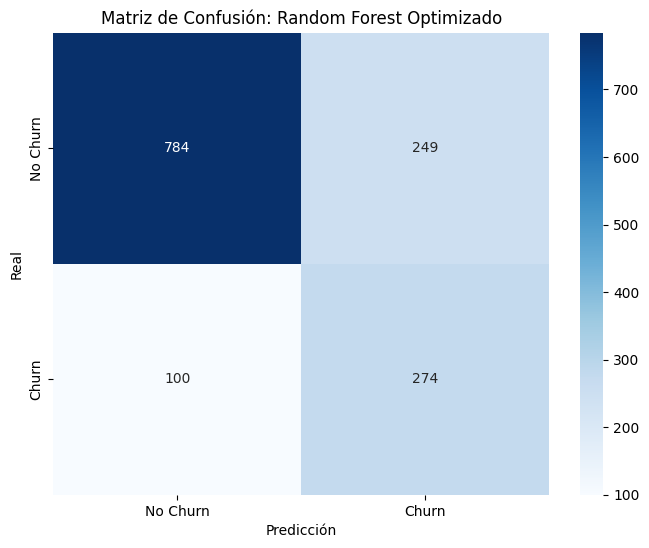


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



In [59]:
# Definir el modelo base
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árboles
    'max_depth': [5, 10, 20],                 # Profundidad máxima
    'min_samples_split': [5, 10, 20],         # Mínimas muestras para dividir un nodo
    'min_samples_leaf': [2, 4, 6]             # Mínimas muestras en una hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='f1_macro',  # Métrica de optimización
    cv=5,                # Validación cruzada de 5 folds
    verbose=2,
    n_jobs=-1            # Utilizar todos los núcleos disponibles
)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrenar el modelo optimizado
rf_optimized = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
rf_optimized.fit(X_train_smote, y_train_smote)

# Realizar predicciones
y_pred_rf_opt = rf_optimized.predict(X_test)

# Evaluar el modelo optimizado
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
conf_matrix_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)
class_report_rf_opt = classification_report(y_test, y_pred_rf_opt)

# Mostrar resultados
print("\n### Evaluación del Modelo Optimizado: Random Forest ###\n")
print(f"Precisión del modelo: {accuracy_rf_opt:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf_opt)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_opt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusión: Random Forest Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(class_report_rf_opt)

# Obtener el mejor modelo tras GridSearchCV
rf_best_model = grid_search.best_estimator_

### **Análisis de Importancia de Características**

En esta sección, realizaremos un análisis para identificar cuáles son las variables más relevantes para el modelo de **Random Forest Optimizado**. Este paso es crucial para entender qué factores influyen más en la predicción del **Churn** y para posibles acciones basadas en estos insights.

---

#### **Objetivo del Análisis**
- Determinar cuáles características del conjunto de datos tienen mayor impacto en las predicciones realizadas por el modelo.
- Generar un gráfico que muestre las **10 características más importantes** según su peso en el modelo.

---

#### **Pasos Realizados**
1. **Extracción de Importancia de Características**:
   - Usamos el atributo `feature_importances_` del modelo optimizado para obtener el peso asignado a cada característica.
2. **Creación del DataFrame**:
   - Las características y su importancia se organizan en un DataFrame para un análisis más claro.
3. **Orden de Importancia**:
   - Se ordenan las características por su importancia de forma descendente.
4. **Visualización**:
   - Un gráfico de barras horizontal muestra de manera visual las características más relevantes.

---

#### **Resultados Esperados**
- Un listado con las 10 principales características que más influyen en el modelo.
- Un gráfico que resalte estas características para un análisis más intuitivo.

Top 10 Características más importantes en el Modelo Random Forest Optimizado:
                    Característica  Importancia
5                   OnlineSecurity     0.094573
3                           tenure     0.089282
17               Contract_Two year     0.076358
19  PaymentMethod_Electronic check     0.065707
14     InternetService_Fiber optic     0.065230
8                      TechSupport     0.060030
6                     OnlineBackup     0.051879
7                 DeviceProtection     0.049150
13                    TotalCharges     0.042132
15              InternetService_No     0.040829


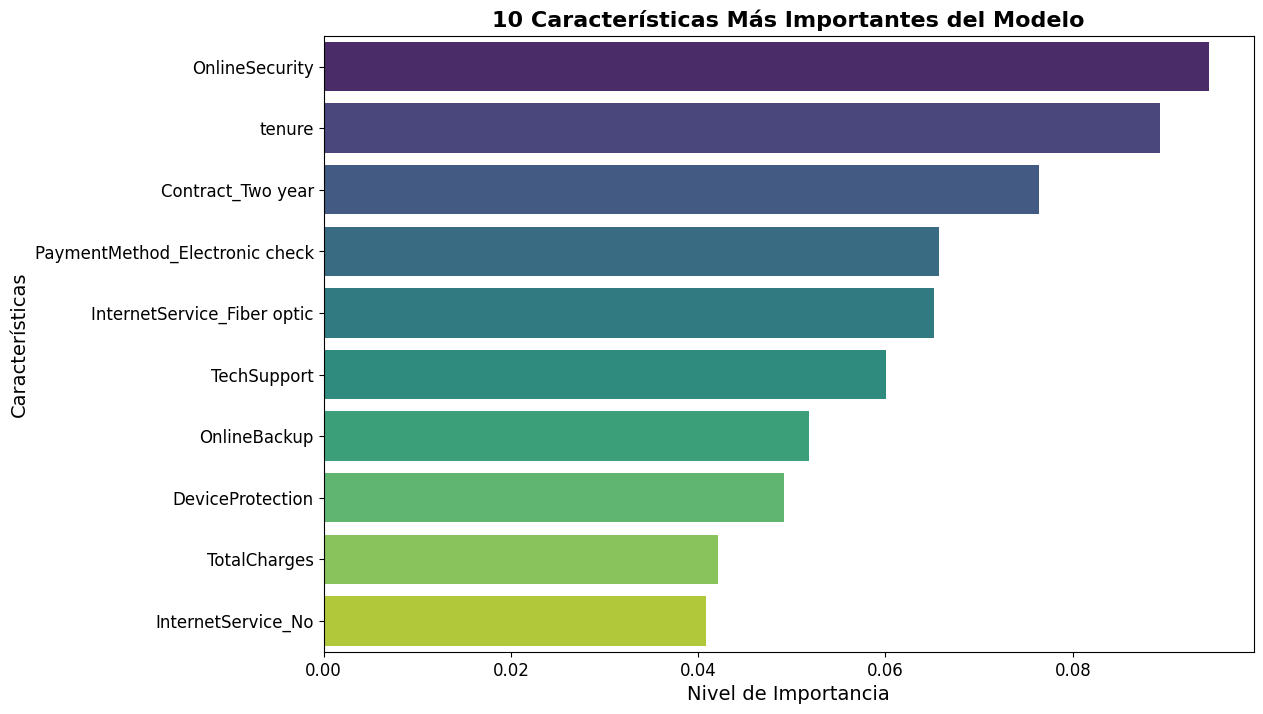

In [ ]:
# Obtener la importancia de características del modelo optimizado
feature_importances = rf_best_model.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': feature_importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 características más importantes
print("Top 10 Características más importantes en el Modelo Random Forest Optimizado:")
print(feature_importance_df.head(10))

# Crear una figura con un tamaño de 12x8 para visualización detallada
plt.figure(figsize=(12, 8))

# Usar sns.barplot con ajuste para evitar FutureWarning
sns.barplot(
    x='Importancia',
    y='Característica',
    data=feature_importance_df.head(10),
    hue='Característica',  # Se asigna la variable `hue` para evitar advertencia
    dodge=False,
    palette="viridis"
)

# Configuración de títulos y etiquetas
plt.title("10 Características Más Importantes del Modelo", fontsize=16, weight='bold')
plt.xlabel("Nivel de Importancia", fontsize=14)
plt.ylabel("Características", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([], [], frameon=False)  # Eliminar leyenda redundante

# Mostrar el gráfico
plt.show()

## Conclusiones del Modelo Random Forest optimizado

### Desempeño del modelo

El modelo **Random Forest** Optimizado logró una precisión general del 75.20% en el conjunto de prueba.
Algunas observaciones clave sobre el desempeño del modelo incluyen:

    - La clase **No Churn** tuvo un mejor rendimiento con un recall de 76%, indicando que el modelo identifica correctamente la mayoría de los clientes que no abandonan el       servicio.

    - La clase **Churn** mostró un recall del 73%, lo cual es positivo pero puede mejorarse para minimizar falsos negativos (clientes que abandonan y no son detectados).
    
El balance entre precisión y recall indica que el modelo es razonablemente robusto, aunque podría beneficiarse de un análisis más profundo de las características y de ajustes adicionales.

### Importancia de Características

Basado en el análisis de importáncia de características del modelo optimizado, las siguientes variables resultaron ser las más relevantes para predecir el churn:

1. **OnlineSecurity**: La falta de un servicio de seguridad en línea tiene el mayor impacto en la probabilidad de abandono.
2. **Tenure**: Los clientes con mayor antigüedad tienen menos probabilidad de abandonar el servicio.
3. **Contract_Two year**: Contratos de dos años disminuyen la probabilidad de churn.
4. **PaymentMethod_Electronic check**: Este método de pago se asocia con una mayor probabilidad de churn, posiblemente por costos mas altos.

Estas características destacan aspectos específicos del servicio que influyen significativamente en la retención o abandono de clientes.

### Recomendaciones para la Retención de clientes.

1. **Promover la Seguridad en Línea**:
    - Ofrecer paquetes de seguridad en línea gratuitos o con descuento a clientes sin este servicio podría mejorar la retención.
2. **Incentivar la Permanencia**:
    - Diseñar programas de fidelización que recompensen a clientes con mayor antoigüedad y promuevan contratos a largo plazo.
3. **Analizar Métodos de Pago**:
    - Realizar un análisis costo-beneficio del servidor de fibra óptica, y explorar estrategias de precios más competitivos.
5. **Atención personalizada**:
    - Identificar clientes en riesgo con base en las características clave(e.g., corto tiempo de tenencia, falta de servicios adicionales) y ofrecer atención personalizada.